<a href="https://colab.research.google.com/github/sueta1995/CourseWork_TRPS/blob/machine_learning/classification/odonata_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization, Conv2D
from keras.layers.pooling import MaxPool2D
from keras.optimizers import SGD

In [15]:
IMG_SIZE = 224
CHANNELS = 3
TRAIN_DIR = '/mnt/d/odonata_data/train_data'
VALID_DIR = '/mnt/d/odonata_data/valid_data'
EPOCHS = 200
BATCH_SIZE = 128

In [3]:
# Для google colab
# from google.colab import drive
# drive.mount('/content/drive')

# VALID_DIR = '/content/drive/MyDrive/odonata_data/valid_data'
# TRAIN_DIR = '/content/drive/MyDrive/odonata_data/train_data'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.15,2.0],
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=32,
    seed=1,
    shuffle=True,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='rgb',
    batch_size=32,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 39600 images belonging to 44 classes.
Found 4400 images belonging to 44 classes.


In [16]:
model = Sequential()

model.add(Conv2D(filters=96, kernel_size=(11, 11),
                 strides=(4, 4), activation="relu",
                 input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(Conv2D(filters=256, kernel_size=(5, 5),
                 strides=(1, 1), activation="relu",
                 padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=384, kernel_size=(3, 3),
                 strides=(1, 1), activation="relu",
                 padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3, 3),
                 strides=(1, 1), activation="relu",
                 padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3),
                 strides=(1, 1), activation="relu",
                 padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(44, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_15 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_16 (Bat  (None, 26, 26, 256)      1024      
 chNormalization)                                                
                                                      

In [ ]:
history = model.fit(
    train_generator,
#     steps_per_epoch=train_num // BATCH_SIZE,
    validation_data=valid_generator,
#     validation_steps=valid_num // BATCH_SIZE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/200


2023-07-24 18:48:04.646674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-24 18:48:04.709952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-24 18:48:04.709992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 25430 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1238/1238 [==============================] - ETA: 0s - loss: 4.2713 - accuracy: 0.0349

2023-07-24 18:55:20.522008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-24 18:55:20.566509: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-24 18:55:20.566549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 25430 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1238/1238 [==============================] - 460s 371ms/step - loss: 4.2713 - accuracy: 0.0349 - val_loss: 3.6953 - val_accuracy: 0.0532
Epoch 2/200
1238/1238 [==============================] - 449s 363ms/step - loss: 3.7932 - accuracy: 0.0476 - val_loss: 3.7598 - val_accuracy: 0.0468
Epoch 3/200
1238/1238 [==============================] - 451s 364ms/step - loss: 3.7000 - accuracy: 0.0558 - val_loss: 3.7284 - val_accuracy: 0.0577
Epoch 4/200
1238/1238 [==============================] - 449s 363ms/step - loss: 3.6275 - accuracy: 0.0674 - val_loss: 3.5272 - val_accuracy: 0.0836
Epoch 5/200
1238/1238 [==============================] - 450s 363ms/step - loss: 3.5670 - accuracy: 0.0749 - val_loss: 3.3992 - val_accuracy: 0.1075
Epoch 6/200
1238/1238 [==============================] - 450s 363ms/step - loss: 3.4906 - accuracy: 0.0871 - val_loss: 3.5311 - val_accuracy: 0.0932
Epoch 7/200
1238/1238 [==============================] - 450s 363ms/step - loss: 3.4293 - accuracy: 0.0959 - val_loss:

In [8]:
model.save('/mnt/d/models/odonata_model')

INFO:tensorflow:Assets written to: mnt/d/models/odonata_model/assets


INFO:tensorflow:Assets written to: mnt/d/models/odonata_model/assets


In [1]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

NameError: name 'plt' is not defined

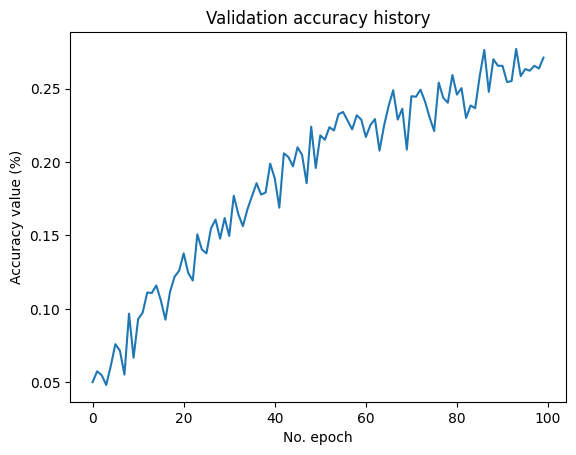

In [10]:
# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()